# Runs for South Sandwich EQ(s)
updated with automatic processing

20210812TT
Loading locally stored waveforms
Working directory now:  /Users/anewman/Documents/Projects/rterg/processing/Examples/events/2021/20210812TT/00
Calculating Energy growth with time 
Running fband [0.0033333333333333335, 2.0] Hz:


100%|██████████| 28/28 [00:02<00:00, 10.32it/s]


Running fband [0.5, 2.0] Hz:


100%|██████████| 28/28 [00:02<00:00, 12.05it/s]


Calculating TACER Values


100%|██████████| 28/28 [00:03<00:00,  8.26it/s]


Median Tacer time = 276.0 -/+ 187.0/289.8 s (25/75th percentile)
From Median Tacer: --------------------------
  Mean BB Energy (Estimated)= 2.61e+16 [Me 8.04]
    1/300 - 2 Hz: 28 traces, 2.61e+16 +- 10^0.20 [J]
    1/2 - 2 Hz: 28 traces, 1.54e+14 +- 10^0.54 [J]
  Mean BB Energy (FM corrected) = 2.78e+16 [Me 8.06]
    1/300 - 2 Hz: 28 traces, 2.78e+16 +- 10^0.17 [J]
    1/2 - 2 Hz: 27 traces, 1.48e+14 +- 10^0.50 [J]
From Per-Station Tacer: ---------------------
  Mean BB Energy (Estimated)= 1.85e+16 [Me 7.94]
    1/300 - 2 Hz: 28 traces, 1.85e+16 +- 10^0.29 [J]
    1/2 - 2 Hz: 28 traces, 1.29e+14 +- 10^0.45 [J]
  Mean BB Energy (FM corrected) = 1.97e+16 [Me 7.96]
    1/300 - 2 Hz: 28 traces, 1.97e+16 +- 10^0.33 [J]
    1/2 - 2 Hz: 28 traces, 1.38e+14 +- 10^0.47 [J]
writing results



colorbar [WARNING]: Your -D option was interpreted to mean -Dx


CPU times: user 20.1 s, sys: 746 ms, total: 20.8 s
Wall time: 17.2 s


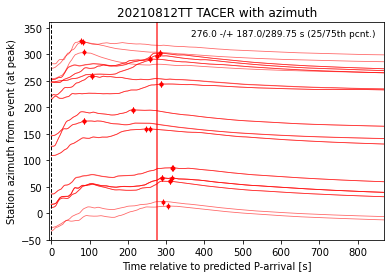

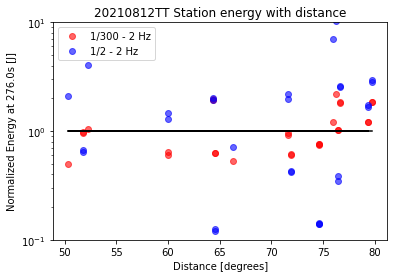

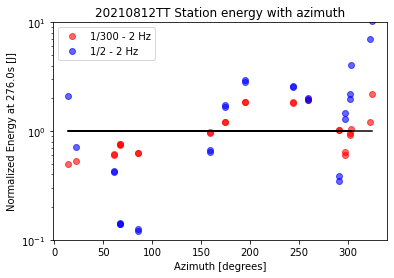

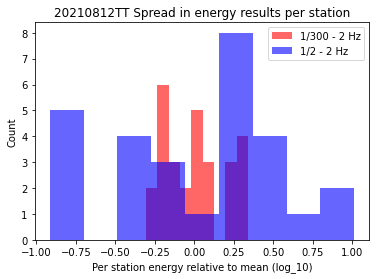

In [1]:
%%time 
from rtergpy.run import defaults, event, etime2name, src2ergs
from obspy import UTCDateTime

Defaults=defaults()
Event=event()

# m7.5 South Sandwich  # strange and very large event
Event.newData=False

eloc = [-57.567,-25.032,47]  # USGS loc and origin 
etime= UTCDateTime(2021,8,12,18,32,52)  
Event.ecount='TT'
Event.eventname=etime2name(etime,ecount=Event.ecount)
print(Event.eventname)
Event.origin=[eloc,etime]
Event.focmech=[106, 26, 56] # phi,delta,lmbda
#Event.focmech=[0, 90, 0] # phi,delta,lmbda
# nearer stations more contaminated
Defaults.waveparams[1][1]=1000 # =postPtime
Defaults.stationrange=[50,80]  # reducing later phase contamination

src2ergs(Defaults=Defaults,Event=Event)  # need to export run output in a coherent way

## plot energy as a function of distance

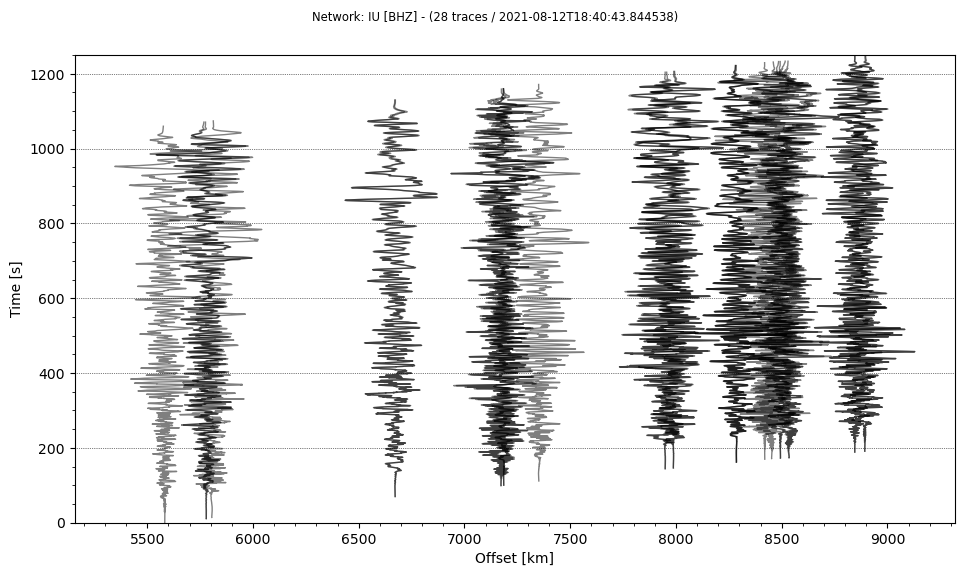

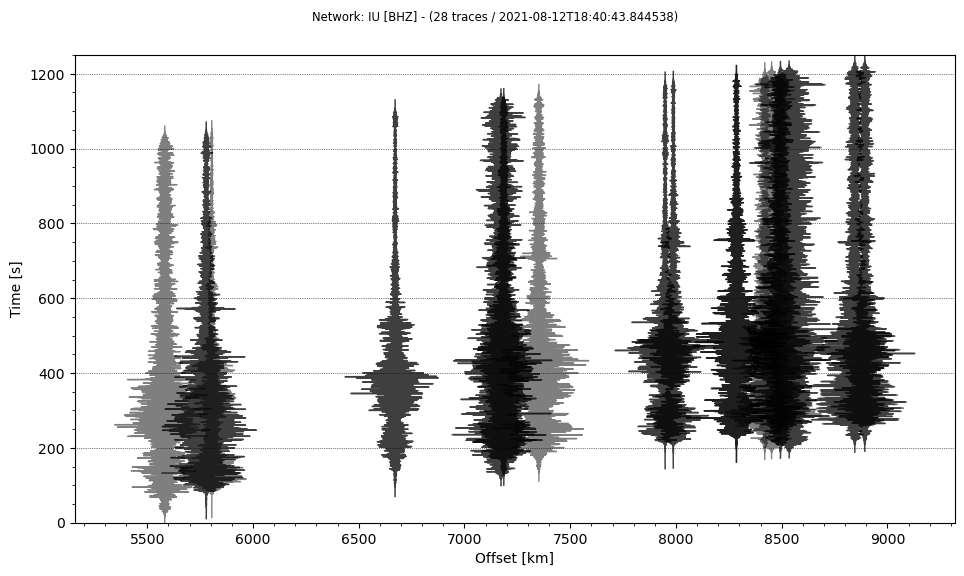

In [2]:
from rtergpy.waveforms import tacerstats,trstat2pd,e2Me,process_waves
# simple Moveout plt
tr=process_waves(st,freqmin=.001,freqmax=2)
tr.plot(type='section', scale=3);
tr=process_waves(st,freqmin=.5,freqmax=2)
tr.plot(type='section', scale=3);
#tr.plot(type='section', scale=5, dist_degree=True, ev_coord=[eloc[0],eloc[1]], orientation='horizontal', reftime=etime);

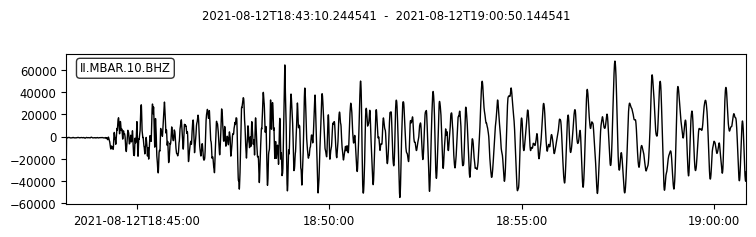

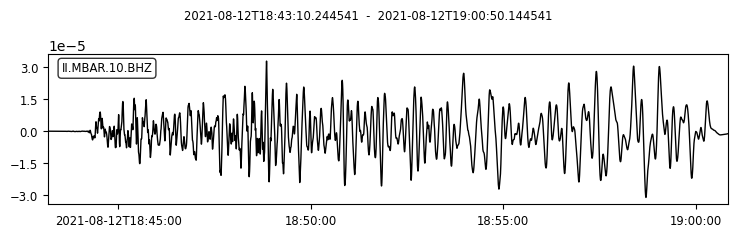

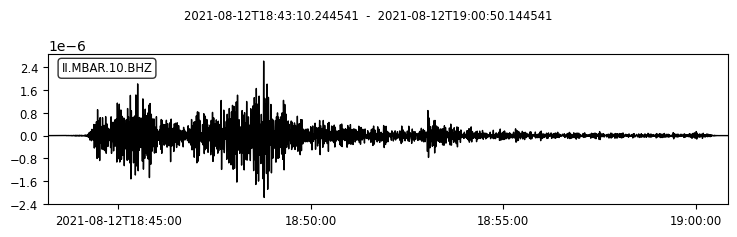

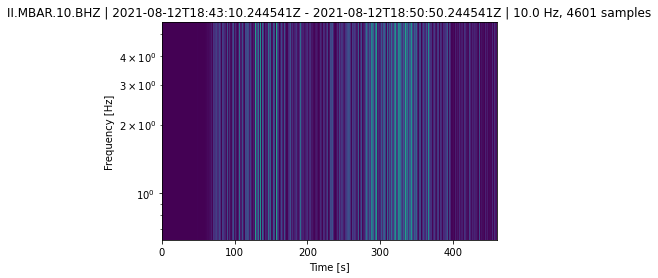

In [5]:
from rtergpy.waveforms import process_waves
ntr=8
st1=st[ntr]
# raw
st1.plot()
# BB
tr1=process_waves(st1,freqmin=.01,freqmax=2)
tr1.plot()
# HF
tr2=process_waves(st1,freqmin=.5,freqmax=2)
tr2.plot()
plt.show()
tr2.trim(tr2.stats.starttime,tr2.stats.starttime+60+400)
tr2.spectrogram(log=True)
#tr.plot(type='section', scale=5, dist_degree=True, ev_coord=[eloc[0],eloc[1]], orientation='horizontal', reftime=etime);

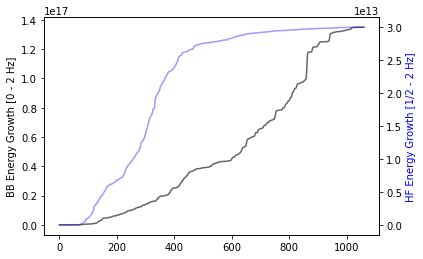

In [6]:
from rtergpy.plotting import Etincplot

Etincplot(EBB,EHF,EBBmd,EHFmd,trdf,ntr=5)

# create other time series products (testing)

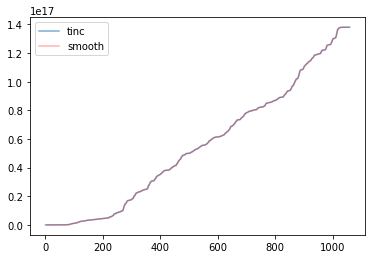

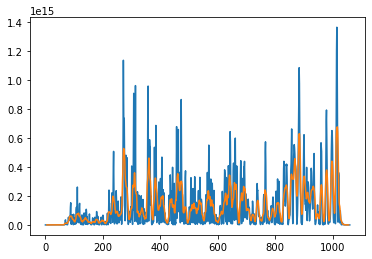

In [7]:
# create smoothed and 1st derivative products
kern=10
ntr=20
#smoothed=eEtinc_BB["CU.ANWB.00.BHZ"].rolling(kern,win_type='gaussian',center=True, closed='both').mean(std=kern/2)#.round(kern*2)
EBBsmooth=EBB.rolling(kern,win_type='gaussian',center=True, closed='both').mean(std=kern/2)
dEdtBB=EBB.diff()
dEdtBBsmooth=EBBsmooth.diff()
#EtincBBsmooth["CU.ANWB.00.BHZ"].plot()
EBB.iloc[:,ntr].plot(alpha=0.6,label="tinc")
EBBsmooth.iloc[:,ntr].plot(alpha=0.3,color='red',label="smooth")
plt.legend()
plt.show()
dEdtBB.iloc[:,ntr].plot()
dEdtBBsmooth.iloc[:,ntr].plot()
#smoothed.plot()
plt.show()

colorbar [WARNING]: Your -D option was interpreted to mean -Dx


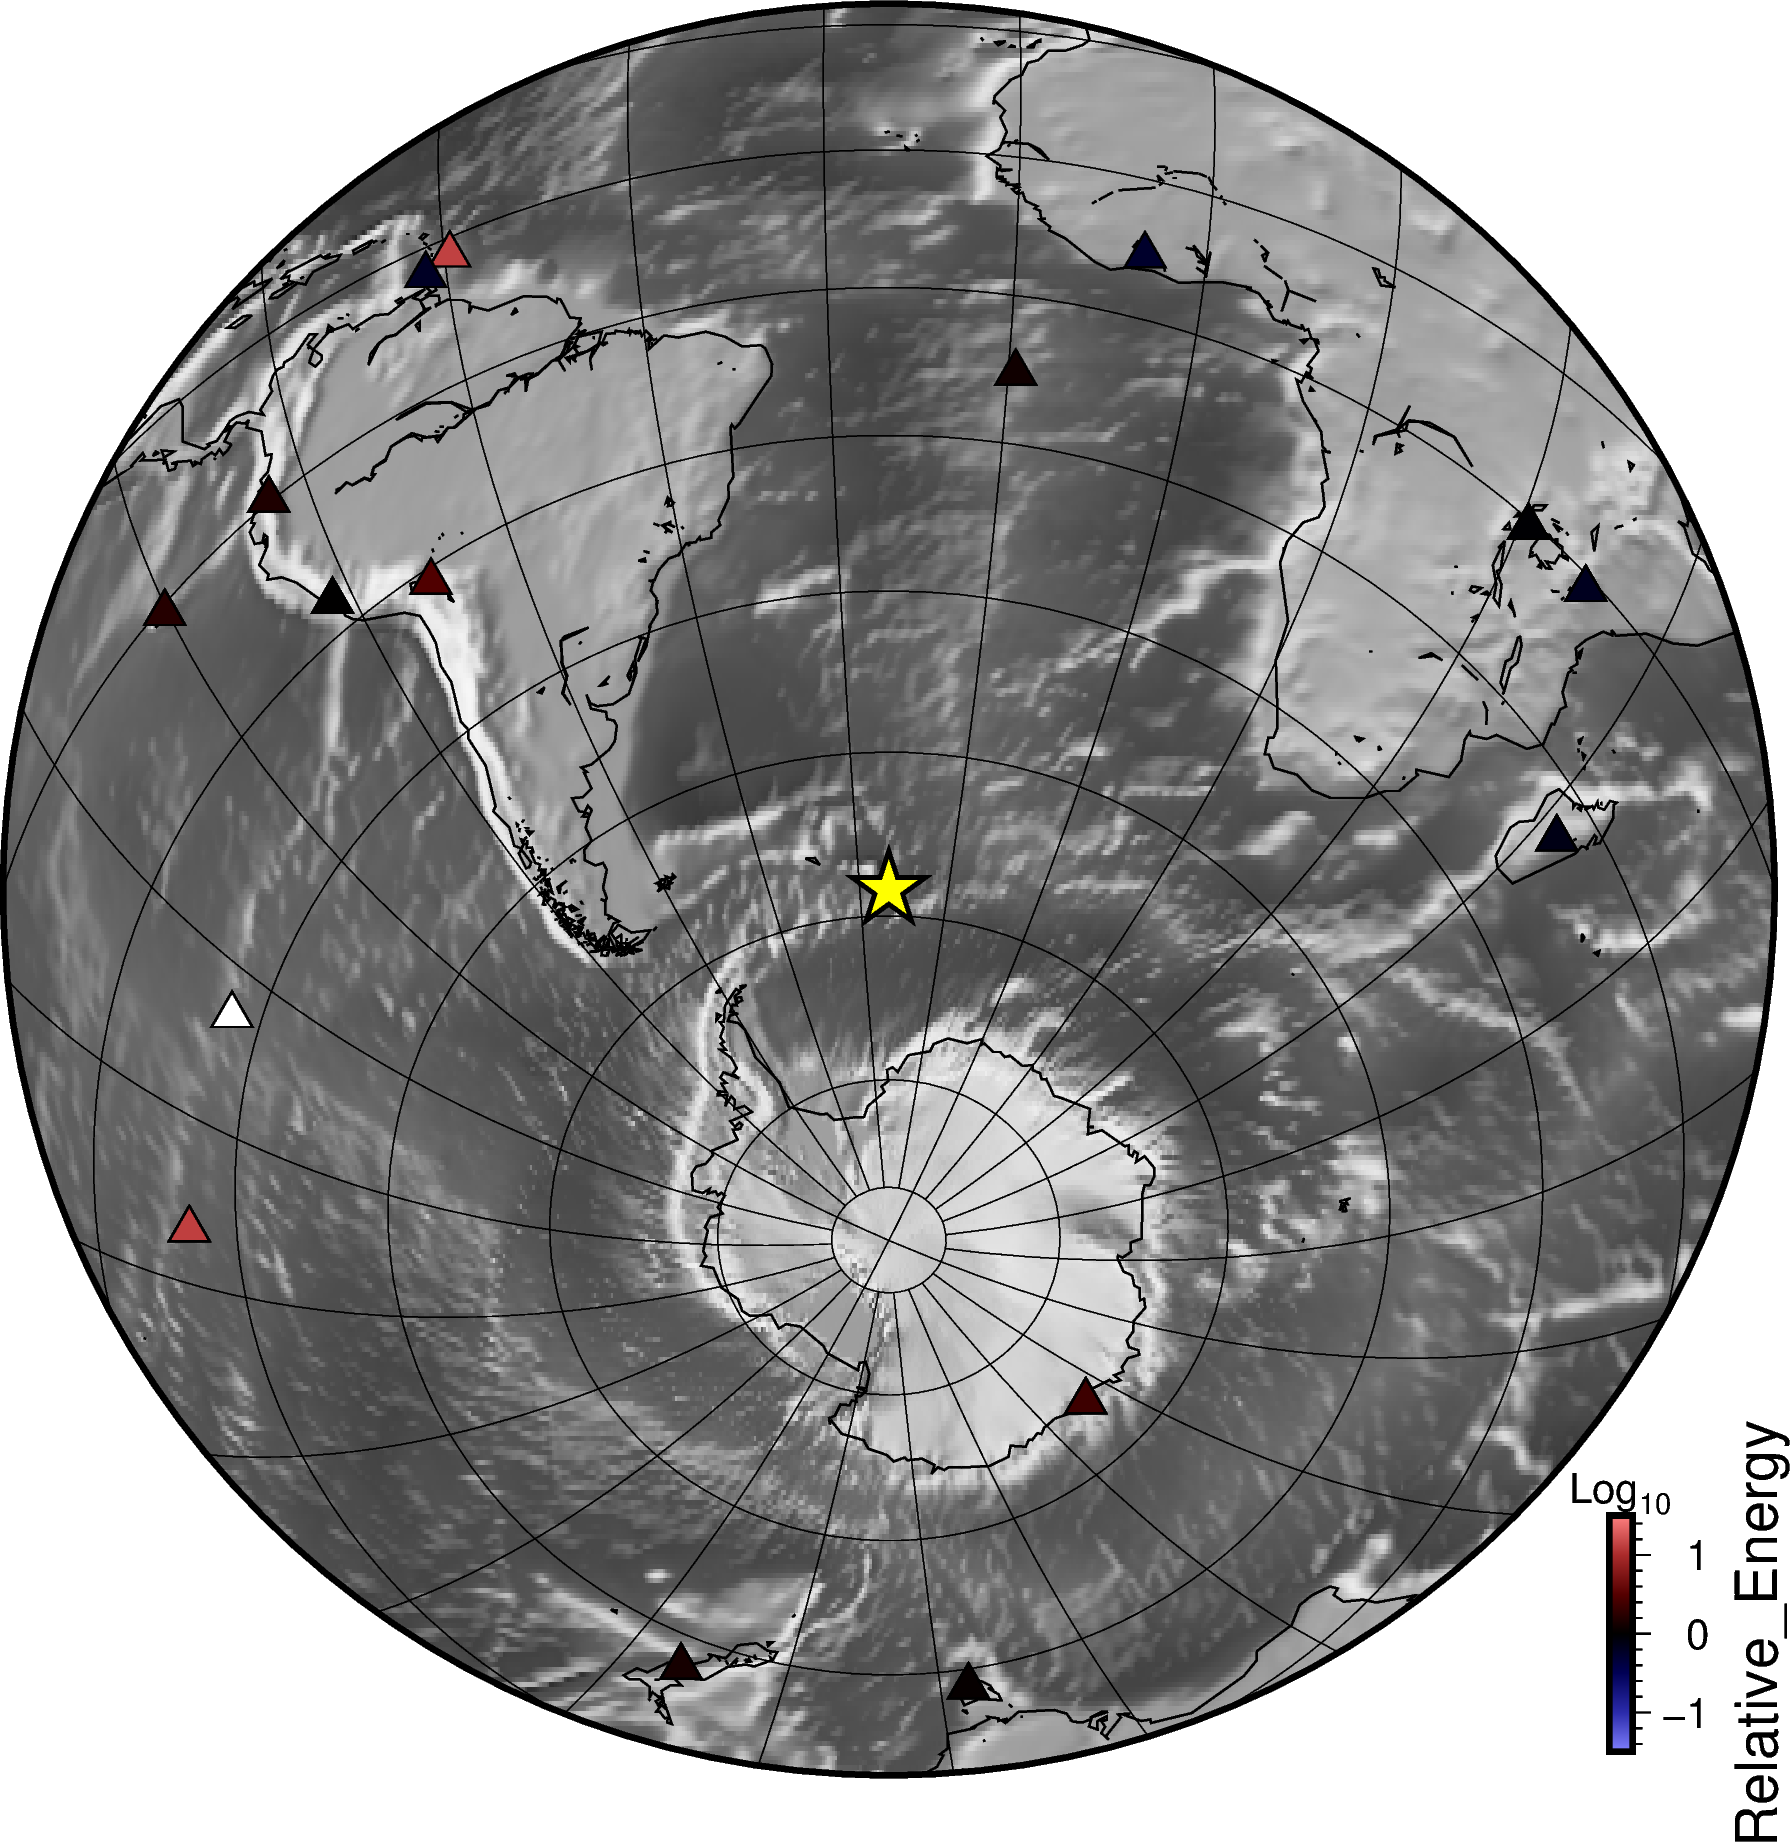

In [8]:
import pygmt as gmt
def stationEmap(E,E_md,trdf,intval=-1,cutoff=15,**kwargs):
    
    fig=gmt.Figure()
    proj="A"+str(eloc[1])+"/"+str(eloc[0])+"/15c"
    grid = gmt.datasets.load_earth_relief(resolution="30m")
    
    eint=np.array(E.iloc[intval])
    emean,keep=gmeanCut(eint,cutoff=cutoff)
    enorm=np.log10(eint/emean)

    lats=[] ; lons=[]
    for netstatchan in E.columns:
        coords= trdf[trdf['netstatchan'] == netstatchan]['coordinates'].tolist()[0]
        lons.append(coords[1])
        lats.append(coords[0])

    #fig.basemap(region="g"
    fig.coast(region="g",land="white", water="skyblue", projection=proj)
    fig.grdimage(grid=grid, cmap="gray", shading=True, projection=proj, transparancy=10)
    fig.coast(shorelines="0.5p,black", frame="afg", projection=proj)
    
    #fig.plot(x=lons,y=lats,style='t0.2c', color="gray", pen="0.5,black")
    gmt.makecpt(cmap="split",continuous="True", series=[-1.5,1.5,0.5])
    fig.plot(x=lons,y=lats,style='t0.4c', color=enorm, cmap=True, pen="0.5,black")
    fig.plot(x=eloc[1],y=eloc[0], style="a0.65c",color="yellow",pen="1p,black")
    fig.colorbar(position="13.6/0.2+w2c/0.2c+v", frame=["x+lRelative_Energy", "y+lLog@-10@-"])
    fig.show()
    fig.savefig('test.png')
stationEmap(EBB,EBBmd,trdf,intval=40,cutoff=15)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



def stationEmap(E,E_md,trdf,intval=-1,cutoff=15,**kwargs):
    import matplotlib as mpl

    eint=np.array(E.iloc[intval])
    emean,keep=gmeanCut(eint,cutoff=cutoff)
    lats=[] ; lons=[]
    for netstatchan in E.columns:
        coords= trdf[trdf['netstatchan'] == netstatchan]['coordinates'].tolist()[0]
        lons.append(coords[1])
        lats.append(coords[0])

    enorm=np.log10(eint/emean)
    
    plt.rcParams['figure.dpi'] = 250  # this controls the size
    plt.figure(figsize=(20,20))
    map = Basemap(projection='ortho',lat_0=eloc[0],lon_0=eloc[1], resolution='l')
    map.drawcoastlines(linewidth=0.25)
    map.drawcountries(linewidth=0.25)
    map.drawmapboundary(fill_color='whitesmoke')
    map.drawmeridians(np.arange(0,360,20))
    map.drawparallels(np.arange(-90,90,30))
    map.bluemarble(scale=.1,alpha=0.45)
    x,y=map(lons,lats)
    #ax.stock_img()  # background (wish I could make it B&W)
    cpt=plt.cm.seismic
   
    plt.scatter(x,y,c=enorm,cmap=cpt,norm=mpl.colors.Normalize(vmin=-1.5,vmax=1.5),marker='^', edgecolors='black', s=800, alpha=0.8)
    ex,ey=map(eloc[1],eloc[0])
    plt.plot(ex,ey, marker='*', color='y', ms=60, mec='k', alpha=0.6)

    plt.show()

stationEmap(EBB,EBBmd,trdf,intval=40,cutoff=15)
# UGGGGH  Cannot use plt.plot to get differing colors (w/o iterating through each). cannot use scatter with this projections

NameError: name 'Basemap' is not defined

<Figure size 5000x5000 with 0 Axes>

# Tacer


In [ ]:
ntr=60  # bad station?
ntr=20
taceBB.iloc[:,ntr].plot()
dEdtBBsmooth.iloc[:,ntr].plot()
plt.show()
EBB.iloc[:,ntr].plot()
plt.show()

# old